# 넷플릭스 주가 데이터 분석 (PJT 02)

금융 상품 비교 애플리케이션 · 관통 프로젝트 02

## 라이브러리 임포트

In [3]:
# NF201: 필수 라이브러리 (requirements.txt 참고)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 함수 정의 (NF203 · 기능별 함수 분리)

데이터 로드, 필터링, 집계, 시각화를 함수로 분리하여 중복을 줄이고 가독성을 높입니다.

In [ ]:
# NF202: 주요 로직에 주석, 직관적 함수명·변수명

def load_netflix_csv(csv_path):
    """CSV를 읽고 Date, Open, High, Low, Close만 선택해 반환. Date는 datetime으로 변환."""
    required_columns = ['Date', 'Open', 'High', 'Low', 'Close']
    data = pd.read_csv(csv_path)
    data = data[required_columns]
    data['Date'] = pd.to_datetime(data['Date'])
    return data


def filter_by_year(data, year):
    """지정 연도 1월 1일 이후 데이터만 필터링."""
    cutoff = f'{year}-01-01'
    return data[data['Date'] >= cutoff].copy()


def get_close_min_max(data):
    """종가(Close)의 최대값·최소값을 (max_val, min_val) 튜플로 반환."""
    return data['Close'].max(), data['Close'].min()


def compute_monthly_avg_close(data):
    """월별로 그룹화한 뒤 평균 종가 Series 반환."""
    data = data.copy()
    data['YearMonth'] = data['Date'].dt.to_period('M')
    return data.groupby('YearMonth')['Close'].mean()


def compute_monthly_high_low_close(data):
    """월별 최고가·최저가·평균 종가를 담은 DataFrame 반환."""
    data = data.copy()
    data['YearMonth'] = data['Date'].dt.to_period('M')
    return data.groupby('YearMonth').agg({'High': 'max', 'Low': 'min', 'Close': 'mean'})


def plot_close_series(data, title, figsize=(12, 6)):
    """종가 시계열 라인 그래프 시각화."""
    plt.figure(figsize=figsize)
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_monthly_avg(monthly_series, title, figsize=(12, 6)):
    """월별 평균 종가 시계열 그래프."""
    plt.figure(figsize=figsize)
    monthly_series.plot()
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Average Close Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_monthly_high_low_close(monthly_data, figsize=(12, 6)):
    """월별 최고가·최저가·평균 종가를 하나의 그래프에 표시."""
    plt.figure(figsize=figsize)
    x_labels = monthly_data.index.astype(str)
    plt.plot(x_labels, monthly_data['High'], label='Monthly High')
    plt.plot(x_labels, monthly_data['Low'], label='Monthly Low')
    plt.plot(x_labels, monthly_data['Close'], label='Monthly Avg Close')
    plt.title('Monthly High / Low / Avg Close (2022 onwards)')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## F202 · CSV 파일 읽기 및 필드 선택

NFLX.csv를 Pandas로 읽고 Date, Open, High, Low, Close 필드만 선택

In [4]:
# F202: CSV 읽기 및 Date, Open, High, Low, Close 필드만 선택
df = load_netflix_csv('archive/NFLX.csv')
df.head()

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001


## F203 · 2021년 이후 데이터 필터링

2021년 이후 데이터만 필터링 후 종가 그래프 시각화

In [6]:
# F203: 2021년 이후 데이터 필터링 후 종가 그래프 시각화
df_2021 = filter_by_year(df, 2021)
df_2021.head()

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994


In [ ]:
# 2021년 이후 종가 시계열 그래프
plot_close_series(df_2021, 'Close Price (2021 onwards)')

## F204 · 최고/최저 종가 추출

2021년 이후 데이터에서 종가(Close) 최대/최소 값 추출

In [7]:
# F204: 2021년 이후 종가(Close) 최대·최소 값 추출
max_close, min_close = get_close_min_max(df_2021)
print("2021년 이후 종가 최대값:", max_close)
print("2021년 이후 종가 최소값:", min_close)

2021년 이후 종가 최대값: 691.690002
2021년 이후 종가 최소값: 359.700012


## F205 · 월별 평균 종가 계산

2021년 이후 데이터를 월별로 그룹화하여 평균 종가 계산 및 시각화

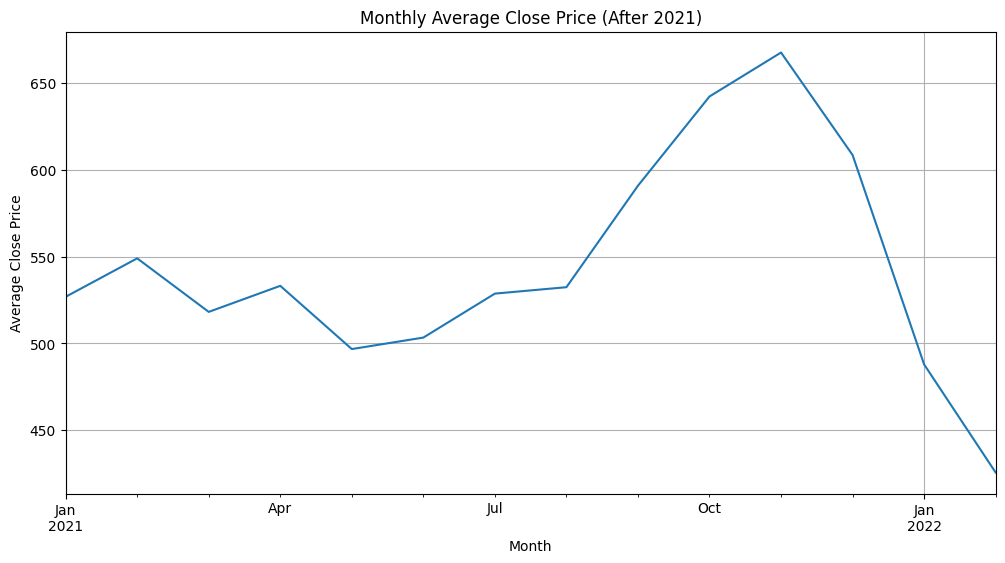

In [8]:
# F205: 2021년 이후 월별 그룹화 → 평균 종가 계산 및 시각화
monthly_avg_close = compute_monthly_avg_close(df_2021)
plot_monthly_avg(monthly_avg_close, 'Monthly Average Close Price (After 2021)')


## F206 · 월별 최고/최저/종가 시각화

2022년 이후 데이터로 월별 최고가, 최저가, 종가를 하나의 그래프에 시각화

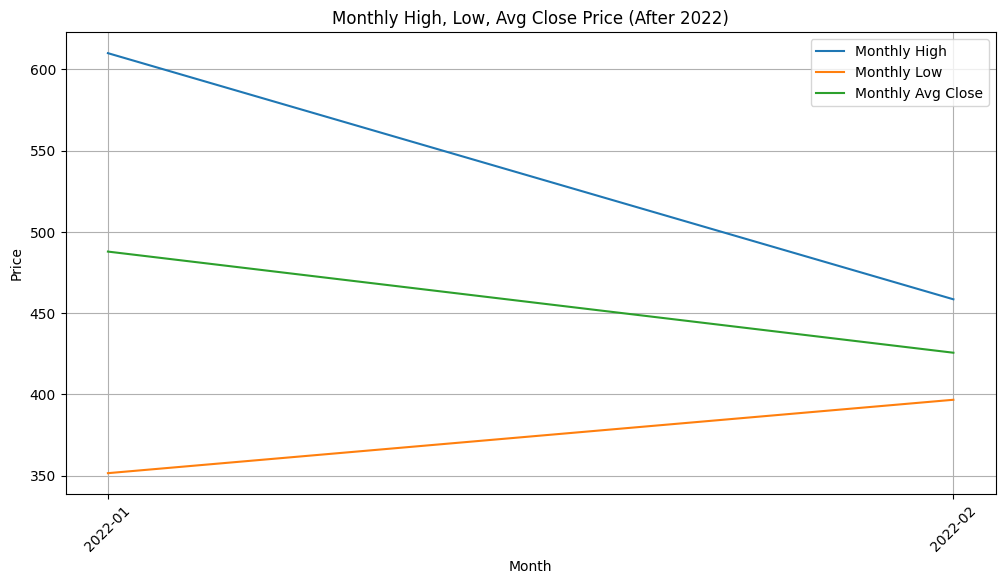

In [9]:

# F206: 2022년 이후 데이터 → 월별 최고가·최저가·종가를 하나의 그래프에 시각화
df_2022 = filter_by_year(df, 2022)
monthly_high_low_close = compute_monthly_high_low_close(df_2022)
plot_monthly_high_low_close(monthly_high_low_close)